# Analysing Survey Responses

In [9]:
import pandas as pd
import numpy as np
import re

# Sklearn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Visual
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [86]:
raw_data = pd.read_excel("data/survey_responses.xlsx", sheet_name="all")
raw_data = raw_data.drop(['Unnamed: 0', 'info:0_help', 'info:1_reason', 'info:2_adhd', 'info:3_stress'], axis=1)

In [87]:
raw_data.head()

,info_injury:0_injury,pain:0_position,synsskarphed:0_Jeg oplever sløret og uklart syn på lang afstand,synsskarphed:1_Jeg oplever sløret og uklart syn på kort afstand,"synsskarphed:2_Jeg oplever, at skarpheden af synet ændrer sig eller varierer i løbet af dagen",synsskarphed:3_Jeg har dårligt nattesyn,synsskarphed:4_Jeg ser ikke godt nok til at køre bil i mørke,synskomfort:0_Jeg får hovedpine eller spændinger efter at have brugt øjnene,synskomfort:1_Jeg bliver svimmel efter at have brugt øjnene,synskomfort:2_Jeg oplever udtrætning / ømhed af øjnene efter at have brugt dem en hel dag,...,rivermead_1_control:6_At være irritabel / bliver nemt vred,rivermead_1_control:7_At føle dig deprimeret eller ked af det,rivermead_2_control:0_At føle dig frustreret eller utålmodig,rivermead_2_control:1_Glemsomhed / dårlig hukommelse,rivermead_2_control:2_Dårlig koncentration,rivermead_2_control:3_At tænke langsommere,rivermead_2_control:4_Sløret syn,"rivermead_2_control:5_Lysfølsomhed, bliver nemt irriteret af skarpt lys",rivermead_2_control:6_At se dobbelt,rivermead_2_control:7_Rastløshed
0,NaN,[],1.0,4.0,0.0,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,['5'],4.0,0.0,2.0,4.0,4.0,4.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,"['0', '1', '2', '4']",0.0,1.0,1.0,0.0,0.0,4.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,['2'],2.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_names = ["info:0_help",
"info:1_reason",	
"info:2_adhd",
"info:3_stress",	
"info_injury:0_injury",
"pain:0_position",
"synsskarphed:0_Jeg oplever sløret og uklart syn på lang afstand",
"synsskarphed:1_Jeg oplever sløret og uklart syn på kort afstand",
"synsskarphed:2_Jeg oplever, at skarpheden af synet ændrer sig eller varierer i løbet af dagen",
"synsskarphed:3_Jeg har dårligt nattesyn",
"synsskarphed:4_Jeg ser ikke godt nok til at køre bil i mørke",
"synskomfort:0_Jeg får hovedpine eller spændinger efter at have brugt øjnene",
"synskomfort:1_Jeg bliver svimmel efter at have brugt øjnene",
"synskomfort:2_Jeg oplever udtrætning / ømhed af øjnene efter at have brugt dem en hel dag",
"synskomfort:3_Mine øjne føles tørre og svier",
"synskomfort:4_Jeg har en trang til at gnide i øjnene",
"dobbeltsyn:0_Jeg oplever dobbeltsyn - især ved træthed",
"dobbeltsyn:1_Jeg bliver nødt til at lukke eller dække det ene øje for at se klart",
"dobbeltsyn:2_Jeg oplever, at teksten flyder sammen under læsning",
"lysfolsomhed:0_Jeg oplever at normal belysning indendørs blænder for meget",
"lysfolsomhed:1_Udendørs lys opleves for skarpt – jeg bliver nødt til at bruge solbriller",
"lysfolsomhed:2_Jeg oplever, at lys fra billygter i mørke blænder / er ubehageligt",
"lysfolsomhed:3_Jeg oplever, at belysning med lysstofrør er generende",
"afstand:0_Jeg fejlbedømmer genstandes placering",
"afstand:1_Jeg oplever usikkerhed ved gang / træder forkert / snubler",
"movement:0_Jeg overser objekter i synsfeltet og går ind i ting",
"movement:1_Jeg undgår større forsamlinger / kan ikke klare steder, der ”ser travle ud”",
"movement:2_Jeg generes ved bevægelse i synsfeltet under transport (fx ved tog- eller bilkørsel)",
"movement:3_Jeg distraheres let af bevægelse i synsfeltet, når jeg er koncentreret (fx under samtale eller læsning)",
"movement:4_Jeg oplever utilpashed ved at kigge efter varer under indkøb",
"movement:5_Jeg har udfordringer med at danne mig et overblik i trafikken",
"movement:6_Min balance bliver påvirket, når jeg ser til siden under gang eller cykling",
"movement:7_Jeg oplever kvalme eller svimmel under transport (bil, bus, tog)",
"reading:0_Jeg undgår læsning på papir",
"reading:1_Min koncentrationsevne er påvirket / jeg distraheres nemt ved læsning",
"reading:2_Jeg læser og skriver langsomt / med besvær",
"reading:3_Jeg har svært ved at forstå det læste",
"reading:4_Jeg har svært ved at huske det læste",
"reading:5_Jeg forveksler ord / springer ord over ved læsning",
"reading:6_Jeg mister læsestedet / må bruge fingeren for ikke at miste læsestedet",
"reading:7_Jeg har begrænset udholdenhed ved læsning på papir eller andet nærarbejde (fx håndarbejde eller lignende)",
"screen:0_Jeg undgår læsning på skærm",
"screen:1_Jeg oplever begrænset udholdenhed ved skærmbrug",
"screen:2_Jeg oplever utilpashed ved hurtige bevægelser på skærmen (fx scrolling på computer, hurtige billedskift på tv)",
"screen:3_Jeg har svært ved / generes af at læse undertekster på tv",
"screen:4_Jeg generes af skærmlys (fx computer, mobil eller tv)",
"screen:5_Jeg oplever smerter omkring øjnene ved læsning, skærmbrug eller andet arbejde på tæt hold",
"screen:6_Det tager tid for mig at stille skarpt på objekter længere væk efter at have arbejdet med ting tæt på (fx computer, læsning eller skrivning)",
"rivermead_1:0_Hovedpine",
"rivermead_1:1_Svimmelhed",
"rivermead_1:2_Kvalme og/eller opkastning",
"rivermead_1:3_Lydfølsomhed / bliver nemt irriteret af høje lyde",
"rivermead_1:4_Søvnproblemer",
"rivermead_1:5_Træthed",
"rivermead_1:6_At være irritabel / bliver nemt vred",
"rivermead_1:7_At føle dig deprimeret eller ked af det",
"rivermead_2:0_At føle dig frustreret eller utålmodig",
"rivermead_2:1_Glemsomhed / dårlig hukommelse",
"rivermead_2:2_Dårlig koncentration",
"rivermead_2:3_At tænke langsommere",
"rivermead_2:4_Sløret syn",
"rivermead_2:5_Lysfølsomhed, bliver nemt irriteret af skarpt lys",
"rivermead_2:6_At se dobbelt",
"rivermead_2:7_Rastløshed"	
"category",
"date",
"id",
"version",
"synsskarphed:2_Jeg oplever, at skarpheden af synet varierer i løbet af dagen",
"synsskarphed:5_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"synskomfort:2_Jeg oplever udtrætning eller ømhed af øjnene efter at have brugt dem en hel dag",
"synskomfort:5_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"dobbeltsyn:3_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"lysfolsomhed:1_Udendørs lys blænder – jeg bliver nødt til at bruge solbriller",
"lysfolsomhed:2_Jeg oplever, at lys fra billygter i mørke blænder eller er ubehageligt",
"lysfolsomhed:4_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"afstand:2_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"movement:1_Jeg undgår situationer med mange synsindtryk",
"movement:6_Min balance bliver påvirket, når jeg ser til siden under gang eller når jeg cykler",
"movement:8_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"reading:1_Min koncentrationsevne er påvirket ved læsning",
"reading:6_Jeg mister læsestedet ved læsning",
"reading:7_Jeg har begrænset udholdenhed ved synskrævende aktiviteter tæt på",
"reading:8_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"screen:3_Jeg har svært ved at læse undertekster på tv",
"screen:7_Hvor ofte oplevede du ovenstående symptomer, før du fik en hjernerystelse?",
"rivermead_1_control:0_Hovedpine",
"rivermead_1_control:1_Svimmelhed",
"rivermead_1_control:2_Kvalme og/eller opkastning",
"rivermead_1_control:3_Lydfølsomhed / bliver nemt irriteret af høje lyde",
"rivermead_1_control:4_Søvnproblemer",
"rivermead_1_control:5_Træthed",
"rivermead_1_control:6_At være irritabel / bliver nemt vred",
"rivermead_1_control:7_At føle dig deprimeret eller ked af det",
"rivermead_2_control:0_At føle dig frustreret eller utålmodig",
"rivermead_2_control:1_Glemsomhed / dårlig hukommelse",
"rivermead_2_control:2_Dårlig koncentration",
"rivermead_2_control:3_At tænke langsommere",
"rivermead_2_control:4_Sløret syn",
"rivermead_2_control:5_Lysfølsomhed, bliver nemt irriteret af skarpt lys",
"rivermead_2_control:6_At se dobbelt",
"rivermead_2_control:7_Rastløshed"]

### Combine columns with same question using coelasce

In [88]:
data_coalesce = raw_data
data_coalesce["synsskarphed:2_Jeg oplever, at skarpheden af synet ændrer sig eller varierer i løbet af dagen"] = (
    data_coalesce[["synsskarphed:2_Jeg oplever, at skarpheden af synet ændrer sig eller varierer i løbet af dagen", 
        "synsskarphed:2_Jeg oplever, at skarpheden af synet varierer i løbet af dagen"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["synskomfort:2_Jeg oplever udtrætning / ømhed af øjnene efter at have brugt dem en hel dag"] = (
    data_coalesce[["synskomfort:2_Jeg oplever udtrætning / ømhed af øjnene efter at have brugt dem en hel dag", 
        "synskomfort:2_Jeg oplever udtrætning eller ømhed af øjnene efter at have brugt dem en hel dag"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["lysfolsomhed:1_Udendørs lys opleves for skarpt – jeg bliver nødt til at bruge solbriller"] = (
    data_coalesce[["lysfolsomhed:1_Udendørs lys opleves for skarpt – jeg bliver nødt til at bruge solbriller", 
        "lysfolsomhed:1_Udendørs lys blænder – jeg bliver nødt til at bruge solbriller"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["lysfolsomhed:2_Jeg oplever, at lys fra billygter i mørke blænder / er ubehageligt"] = (
    data_coalesce[["lysfolsomhed:2_Jeg oplever, at lys fra billygter i mørke blænder / er ubehageligt", 
        "lysfolsomhed:2_Jeg oplever, at lys fra billygter i mørke blænder eller er ubehageligt"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["movement:1_Jeg undgår større forsamlinger / kan ikke klare steder, der ”ser travle ud”"] = (
    data_coalesce[["movement:1_Jeg undgår større forsamlinger / kan ikke klare steder, der ”ser travle ud”", 
        "movement:1_Jeg undgår situationer med mange synsindtryk"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["movement:6_Min balance bliver påvirket, når jeg ser til siden under gang eller cykling"] = (
    data_coalesce[["movement:6_Min balance bliver påvirket, når jeg ser til siden under gang eller cykling", 
        "movement:6_Min balance bliver påvirket, når jeg ser til siden under gang eller når jeg cykler"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["reading:1_Min koncentrationsevne er påvirket / jeg distraheres nemt ved læsning"] = (
    data_coalesce[["reading:1_Min koncentrationsevne er påvirket / jeg distraheres nemt ved læsning", 
        "reading:1_Min koncentrationsevne er påvirket ved læsning"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["reading:6_Jeg mister læsestedet / må bruge fingeren for ikke at miste læsestedet"] = (
    data_coalesce[["reading:6_Jeg mister læsestedet / må bruge fingeren for ikke at miste læsestedet", 
        "reading:6_Jeg mister læsestedet ved læsning"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["reading:7_Jeg har begrænset udholdenhed ved læsning på papir eller andet nærarbejde (fx håndarbejde eller lignende)"] = (
    data_coalesce[["reading:7_Jeg har begrænset udholdenhed ved læsning på papir eller andet nærarbejde (fx håndarbejde eller lignende)", 
        "reading:7_Jeg har begrænset udholdenhed ved synskrævende aktiviteter tæt på"]]
    .bfill(axis=1).iloc[:, 0]
)
data_coalesce["screen:3_Jeg har svært ved / generes af at læse undertekster på tv"] = (
    data_coalesce[["screen:3_Jeg har svært ved / generes af at læse undertekster på tv", 
        "screen:3_Jeg har svært ved at læse undertekster på tv"]]
    .bfill(axis=1).iloc[:, 0]
)


### Split data in meta data and question

In [89]:
metadata = data_coalesce.filter(["category", "date", "id", "version"])
data = data_coalesce.drop(["category", "date", "id", "version"], axis=1)

### Rename columns

In [90]:
column_names = data.columns
column_dict = { c:("").join(re.split(r"(:[0-9])_", c)[0:2]) for c in column_names}
data.columns = column_dict.values()

### Use coalesce to combine answers from patient and control group

In [91]:
data['rivermead_1:0'] = data[['rivermead_1:0', 'rivermead_1_control:0']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:1'] = data[['rivermead_1:1', 'rivermead_1_control:1']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:2'] = data[['rivermead_1:2', 'rivermead_1_control:2']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:3'] = data[['rivermead_1:3', 'rivermead_1_control:3']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:4'] = data[['rivermead_1:4', 'rivermead_1_control:4']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:5'] = data[['rivermead_1:5', 'rivermead_1_control:5']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:6'] = data[['rivermead_1:6', 'rivermead_1_control:6']].bfill(axis=1).iloc[:, 0]
data['rivermead_1:7'] = data[['rivermead_1:7', 'rivermead_1_control:7']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:0'] = data[['rivermead_2:0', 'rivermead_2_control:0']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:1'] = data[['rivermead_2:1', 'rivermead_2_control:1']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:2'] = data[['rivermead_2:2', 'rivermead_2_control:2']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:3'] = data[['rivermead_2:3', 'rivermead_2_control:3']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:4'] = data[['rivermead_2:4', 'rivermead_2_control:4']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:5'] = data[['rivermead_2:5', 'rivermead_2_control:5']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:6'] = data[['rivermead_2:6', 'rivermead_2_control:6']].bfill(axis=1).iloc[:, 0]
data['rivermead_2:7'] = data[['rivermead_2:7', 'rivermead_2_control:7']].bfill(axis=1).iloc[:, 0]

data = data.drop([
    'rivermead_1_control:0', 
    'rivermead_1_control:1', 
    'rivermead_1_control:2',
    'rivermead_1_control:3',
    'rivermead_1_control:4',
    'rivermead_1_control:5',
    'rivermead_1_control:6',
    'rivermead_1_control:7',
    'rivermead_2_control:0',
    'rivermead_2_control:1',
    'rivermead_2_control:2',
    'rivermead_2_control:3',
    'rivermead_2_control:4',
    'rivermead_2_control:5',
    'rivermead_2_control:6',
    'rivermead_2_control:7'
], axis=1)

### Define topic dict

In [92]:
# topics = list( set( re.split("[:]", s)[0] for s in data.columns))
column_names = data.columns
column_dict = { c:("").join(re.split(r"(:[0-9])_", c)[0:2]) for c in column_names}
topics = list( set( re.split("[:]", s)[0] for s in column_dict.values()))

In [93]:
topics

['dobbeltsyn',
 'lysfolsomhed',
 'reading',
 'info_injury',
 'pain',
 'afstand',
 'rivermead_2',
 'synsskarphed',
 'rivermead_1',
 'screen',
 'synskomfort',
 'movement']

In [94]:
topic_dict = {t:[] for t in topics}

for i in list(column_dict.values()): # Change to data.columns
    for t in topics:
        if t in i:
            topic_dict[t].append(i)
            
# Problem with info

In [95]:
topic_dict

{'dobbeltsyn': ['dobbeltsyn:0',
  'dobbeltsyn:1',
  'dobbeltsyn:2',
  'dobbeltsyn:3'],
 'lysfolsomhed': ['lysfolsomhed:0',
  'lysfolsomhed:1',
  'lysfolsomhed:2',
  'lysfolsomhed:3',
  'lysfolsomhed:4'],
 'reading': ['reading:0',
  'reading:1',
  'reading:2',
  'reading:3',
  'reading:4',
  'reading:5',
  'reading:6',
  'reading:7',
  'reading:8'],
 'info_injury': ['info_injury:0'],
 'pain': ['pain:0'],
 'afstand': ['afstand:0', 'afstand:1', 'afstand:2'],
 'rivermead_2': ['rivermead_2:0',
  'rivermead_2:1',
  'rivermead_2:2',
  'rivermead_2:3',
  'rivermead_2:4',
  'rivermead_2:5',
  'rivermead_2:6',
  'rivermead_2:7'],
 'synsskarphed': ['synsskarphed:0',
  'synsskarphed:1',
  'synsskarphed:2',
  'synsskarphed:3',
  'synsskarphed:4',
  'synsskarphed:5'],
 'rivermead_1': ['rivermead_1:0',
  'rivermead_1:1',
  'rivermead_1:2',
  'rivermead_1:3',
  'rivermead_1:4',
  'rivermead_1:5',
  'rivermead_1:6',
  'rivermead_1:7'],
 'screen': ['screen:0',
  'screen:1',
  'screen:2',
  'screen:3',
 

### Recombine data

In [96]:
data_full = pd.concat([data, metadata], axis=1)

### Remove null values

In [116]:
n_rows, n_cols = data_full.shape

In [117]:
row_nan_count = data_full.isna().sum(axis=1)

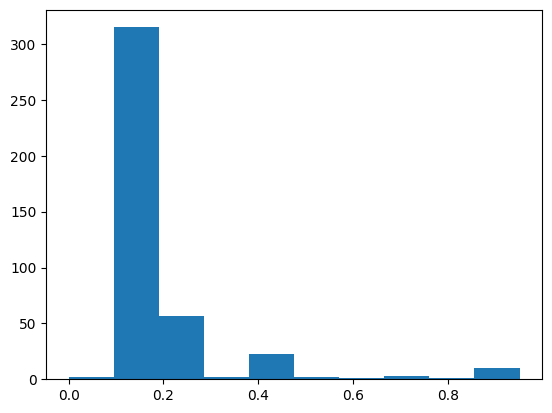

In [118]:
plt.hist(row_nan_count/n_cols);

In [ ]:
# Remove rows with participant that have answered less than 60 % of the questions
m = row_nan_count <= round(n_cols*0.50)
data_rm_rows = data_full[m]

In [122]:
data_full.shape[0]-data_rm_rows.shape[0]

16

In [125]:
data_rm_rows.shape

(400, 82)

In [123]:
n_rows, n_cols = data_rm_rows.shape
col_nan_count = data_rm_rows.isna().sum(axis=0)

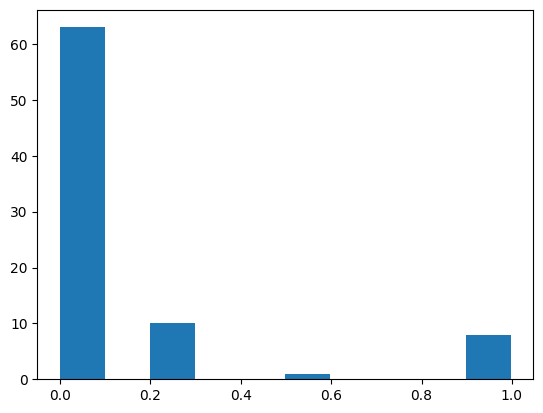

In [124]:
plt.hist(col_nan_count/n_rows);

In [148]:
# Remove columns with questions answered by less than 60 % of the participants
m = col_nan_count <= round(n_rows*0.40)
data_rm_rows_cols = data_rm_rows.loc[:,m]

In [149]:
data_rm_rows_cols.shape

(400, 73)

In [135]:
data_rm_rows_cols.columns

Index(['pain:0', 'synsskarphed:0', 'synsskarphed:1', 'synsskarphed:2',
       'synsskarphed:3', 'synsskarphed:4', 'synskomfort:0', 'synskomfort:1',
       'synskomfort:2', 'synskomfort:3', 'synskomfort:4', 'dobbeltsyn:0',
       'dobbeltsyn:1', 'dobbeltsyn:2', 'lysfolsomhed:0', 'lysfolsomhed:1',
       'lysfolsomhed:2', 'lysfolsomhed:3', 'afstand:0', 'afstand:1',
       'movement:0', 'movement:1', 'movement:2', 'movement:3', 'movement:4',
       'movement:5', 'movement:6', 'movement:7', 'reading:0', 'reading:1',
       'reading:2', 'reading:3', 'reading:4', 'reading:5', 'reading:6',
       'reading:7', 'screen:0', 'screen:1', 'screen:2', 'screen:3', 'screen:4',
       'screen:5', 'screen:6', 'rivermead_1:0', 'rivermead_1:1',
       'rivermead_1:2', 'rivermead_1:3', 'rivermead_1:4', 'rivermead_1:5',
       'rivermead_1:6', 'rivermead_1:7', 'rivermead_2:0', 'rivermead_2:1',
       'rivermead_2:2', 'rivermead_2:3', 'rivermead_2:4', 'rivermead_2:5',
       'rivermead_2:6', 'rivermead_2:7',

In [139]:
data_rm_rows_cols

,pain:0,synsskarphed:0,synsskarphed:1,synsskarphed:2,synsskarphed:3,synsskarphed:4,synskomfort:0,synskomfort:1,synskomfort:2,synskomfort:3,...,movement:1,movement:6,reading:1,reading:6,reading:7,screen:3,category,date,id,version
0,[],1.0,4.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,CONTROL,2022-12-14,96,2.4
1,['5'],4.0,0.0,2.0,4.0,4.0,4.0,0.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2022-12-19,89,2.4
2,"['0', '1', '2', '4']",0.0,1.0,1.0,0.0,0.0,4.0,3.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2022-12-19,93,2.4
3,['2'],2.0,3.0,3.0,0.0,0.0,3.0,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2022-12-05,87,2.4
5,['3'],4.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2022-12-12,89,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,['6'],3.0,0.0,0.0,3.0,3.0,0.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,CONTROL,2023-05-10,177,4.5
412,"['0', '2', '3']",1.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2023-05-07,173,4.0
413,['6'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,CONTROL,2023-04-18,157,3.0
414,['1'],4.0,4.0,3.0,3.0,0.0,4.0,4.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,PATIENT,2023-04-18,161,3.0


### Transform to binary columns

In [ ]:
import ast

pain = data_rm_rows_cols['pain:0']
category = data_rm_rows_cols.filter(['category'])
data_rm_rows_cols = data_rm_rows_cols.drop(["pain:0", "category"], axis=1)

pain = pain.apply(ast.literal_eval).apply(lambda x: '|'.join(x)).str.get_dummies()
pain.columns = [f"pain:{v}" for v in pain.columns]

category = category.get_dummies() # This might not work ^??

data_encoded = pd.concat([data_rm_rows_cols, pain, category], axis=1)

AttributeError: 'Series' object has no attribute 'get_dummies'

In [151]:
category

0      CONTROL
1      PATIENT
2      PATIENT
3      PATIENT
5      PATIENT
        ...   
410    CONTROL
412    PATIENT
413    CONTROL
414    PATIENT
415    PATIENT
Name: category, Length: 400, dtype: object

In [146]:
pain

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,1,1,1,0,1,0,0
3,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
410,0,0,0,0,0,0,1
412,1,0,1,1,0,0,0
413,0,0,0,0,0,0,1
414,0,1,0,0,0,0,0


0                []
1               [5]
2      [0, 1, 2, 4]
3               [2]
5               [3]
           ...     
410             [6]
412       [0, 2, 3]
413             [6]
414             [1]
415          [2, 3]
Name: pain:0, Length: 400, dtype: object

### Save cleaned data

In [ ]:
data_clean = data_encoded

In [ ]:
data_clean.to_excel("data/test.xlsx")

### Split data

In [ ]:
X = data_clean.drop("category", "date", "id", "version")
y = data_clean["category"]
metadata = data_clean["date", "id", "version"]

## Analysis

In [ ]:
topic_areas = [
    topic_dict["info"] 
        + topic_dict["movement"] 
        + topic_dict["info"] 
        + topic_dict["synsskarphed"] 
        + topic_dict["afstand"] 
        + topic_dict["screen"] 
        + topic_dict["pain"] 
        + topic_dict["lysfolsomhed"] 
        + topic_dict["reading"] 
        + topic_dict["dobbeltsyn"]
        + topic_dict["synskomfort"],
    topic_dict["river_mead_1"]
        + topic_dict["river_mead_2"],
    topic_dict["synsskarphed"] 
        + topic_dict["movement"] 
        + topic_dict["afstand"] 
        + topic_dict["screen"] 
        + topic_dict["lysfolsomhed"] 
        + topic_dict["reading"] 
        + topic_dict["dobbeltsyn"] 
        + topic_dict["synskomfort"],
    topic_dict["pain"]]

### PCA Analysis

Inspiration: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

In [ ]:
pca = PCA(n_components=2)

# X_transformed = pca.fit(X).transform(X)
# pca.explained_variance_ratio_

In [ ]:
# Define plot 
fig, axs = plt.subplots(1, len(topic_areas), figsize=(10, 5), sharex=True, sharey=True)
plt.tight_layout();
fig.subplots_adjust(wspace=0.1, hspace=.2);

# Define color schemes
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Define titles
titles = ["Alle", "Rivermead", "Syn", "Pain"]

for i in range(len(topic_areas)):
    X_subset = X.filter(topic_areas[i])
    X_transformed = pca.fit(X_subset).transform(X_subset)
    
    # Get ax
    ax = axs[i]

    # Plot also the training points
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
    
    ax.set_title(titles[i]);

    ax.set_xlabel("$x_1$");
    ax.set_ylabel("$x_2$");

plt.title("PCA")
plt.show()

### LDA

Inpiration: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [ ]:
# target_names = ["Patient", "Control"]

# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)

# plt.figure()
# colors = ["navy", "turquoise", "darkorange"]
# lw = 2

# plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(
#         X_r2[y == i, 0], 
#         X_r2[y == i, 1], 
#         alpha=0.8, 
#         color=color, 
#         label=target_name
#     )
# plt.legend(loc="best", shadow=False, scatterpoints=1)
# plt.title("LDA of IRIS dataset")

# plt.show()

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
# Define plot 
fig, axs = plt.subplots(1, len(topic_areas), figsize=(10, 5), sharex=True, sharey=True)
plt.tight_layout();
fig.subplots_adjust(wspace=0.1, hspace=.2);

# Define color schemes
# cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

# Define titles
titles = ["Alle", "Rivermead", "Syn", "Pain"]

for i in range(len(topic_areas)):
    X_subset = X.filter(topic_areas[i])
    X_transformed = lda.fit(X_subset, y).transform(X)
    
    # Get ax
    ax = axs[i]

    # Plot also the training points
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor="black", ax=ax)
    
    ax.set_title(titles[i]);

    ax.set_xlabel("$x_1$");
    ax.set_ylabel("$x_2$");

plt.title("LDA")
plt.show()

### Gaussian Mixture Clustering

Inpiration: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

In [ ]:
# Dicts to save WCSS and BCSS
within_cluster_variance = {"n_clusters" : [], "Within cluster ss" : []}
between_cluster_variance = {"n_clusters" : [], "Between cluster ss" : []}
cluster_balance = {"n_clusters" : [], "Cluster balance" : []}
silhouette_score = {"n_clusters" : [], "Silhouette score" : []}
cluster_purity = {"n_clusters" : [], "Cluster purity" : []}

pca = PCA(n_components=2)

n_splits=5
skf = StratifiedKFold(n_splits=n_splits, random_state=42)

for n_clusters in range(2,11):
    wcss_test = []
    bcss_test = []
    sil_test = []
    cps_test = []

    for train_index, test_index in skf.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        model = GaussianMixture(n_components=n_clusters, covariance_type='full', init_params='k-means++', random_state=42)
        model.fit(X_train)

        # Predict labels
        labels_train = model.predict(X_train)
        labels_test = model.predict(X_test)

        # Compute WCSS on Test Data
        wcss = np.sum([
            np.mean(np.linalg.norm(X_test[labels_test == k] - model.means_[k], axis=1) ** 2)
            for k in range(model.n_components) if np.any(labels_test == k)
        ])

        # Compute Global Mean for Test Data
        global_mean_test = np.mean(X_test, axis=0)

        # Compute BCSS on Test Data
        bcss = np.sum([
            len(X_test[labels_test == k]) * np.linalg.norm(model.means_[k] - global_mean_test) ** 2
            for k in range(model.n_components) if np.any(labels_test=k)
        ])

        # Compute silhouette score
        sil = silhouette_score(X_test, labels_test)

        # Compute Purity Score (how well clusters match patient/control labels)
        contingency_matrix = np.zeros((n_clusters, 2))  # Assuming two classes (patients & controls)
        for k in range(n_clusters):
            if np.any(labels_test == k):
                contingency_matrix[k, 0] = np.sum((labels_test == k) & (y_test == 0))  # Controls
                contingency_matrix[k, 1] = np.sum((labels_test == k) & (y_test == 1))  # Patients
        cps = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

        # Save wcss and bcss temporarity
        wcss_test.append(wcss)
        bcss_test.append(bcss)
        sil_test.append(sil)
        cps_test.append(cps)

    # Save scores
    wcss_avg = np.mean(wcss_test)
    bcss_avg = np.mean(bcss_test)
    sil_avg = np.mean(sil_test)
    cps_avg = np.mean(cps_test)

    within_cluster_variance["n_clusters"].append(n_clusters)
    within_cluster_variance["Withing cluster ss"].append(wcss_avg)

    between_cluster_variance["n_clusters"].append(n_clusters)
    between_cluster_variance["Between cluster ss"].append(bcss_avg)

    cluster_balance["n_clusters"].append(n_clusters)
    cluster_balance["Cluster balance"].append((bcss_avg-wcss_avg)/(bcss_avg+wcss_avg))

    silhouette_score["n_clusters"].append(n_clusters)
    silhouette_score["Silhouette score"].append(sil_avg)

    cluster_purity["n_clusters"].append(n_clusters)
    cluster_purity["Cluster purity"].append(cps_avg)

#### Optimal number of clusters

In [ ]:
within_cluster_variance_df = pd.DataFrame.from_dict(within_cluster_variance)
between_cluster_variance_df = pd.DataFrame.from_dict(between_cluster_variance)
cluster_balance_index_df = pd.DataFrame.from_dict(cluster_balance)
silhouette_score_df = pd.DataFrame.from_dict(silhouette_score)

plot_data = within_cluster_variance_df.set_index("n_clusters") \
    .join(between_cluster_variance_df.set_index("n_clusters")) \
    .join(cluster_balance_index_df).set_index("n_clusters") \
    .join(silhouette_score_df).set_index("n_clusters")

sns.lineplot(data = plot_data)

#### Plot result of clustering

In [ ]:
n_cluster_optimal = 3

# Gaussian mixture
gmm = GaussianMixture(n_components=n_cluster_optimal, covariance_type='full', init_params='k-means++', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# PCA
pca = PCA(n_components=2)
X_transformed = pca.fit(X).transform(X)

# Plot cluster data
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=labels, palette='viridis', alpha=1.0, edgecolor="black")

### Hierarchical clustering

In [ ]:
# Dicts to save WCSS and BCSS
silhouette_score = {"n_cluster" : [], "Silhouette score" : []}
cluster_purity = {"n_clusters" : [], "Cluster purity" : []}

pca = PCA(n_components=2)

n_splits=5
skf = StratifiedKFold(n_splits=n_splits, random_state=42)

for n_clusters in range(2,11):
    sil_test = []
    cps_test = []

    for train_index, test_index in skf.split(X, y):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        model = AgglomerativeClustering(n_clusters=n_clusters, linkage="euclidean", linkage="ward")
        model.fit(X_train)

        # Predict labels
        labels_train = model.predict(X_train)
        labels_test = model.predict(X_test)

        # Compute silhouette score
        sil_score = silhouette_score(X_test, labels_test)

        # Compute Purity Score (how well clusters match patient/control labels)
        contingency_matrix = np.zeros((n_clusters, 2))  # Assuming two classes (patients & controls)
        for k in range(n_clusters):
            if np.any(labels_test == k):
                contingency_matrix[k, 0] = np.sum((labels_test == k) & (y_test == 0))  # Controls
                contingency_matrix[k, 1] = np.sum((labels_test == k) & (y_test == 1))  # Patients
        cps = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

        # Save wcss and bcss temporarity
        sil_test.append(sil_score)
        cps_test.append(cps)

    # Save scores
    sil_avg = np.mean(sil_test)
    cps_avg = np.mean(cps_test)

    silhouette_score["n_clusters"].append(n_clusters)
    silhouette_score["Silhouette score"].append(sil_avg)

    cluster_purity["n_clusters"].append(n_clusters)
    cluster_purity["Cluster purity"].append(cps_avg)

    cluster_balance["n_clusters"].append(n_clusters)
    cluster_balance["Cluster purity"].append((bcss_avg-wcss_avg)/(bcss_avg+wcss_avg))

#### Optimal number of clusters

In [ ]:
silhouette_score_df = pd.DataFrame.from_dict(silhouette_score)

sns.lineplot(data = silhouette_score_df)